# Анализ методов и моделей для решения задачи прогнозирования
**Выполнил: Сабитов Алексей**

#Оглавление
- Цель
- Задачи
- Модели и их реализация
- Методы и их реализация 
- Виды расчета ошибок при прогнозировании
- Заключение 
- Источники

___


# Цель
Исследовать и реализовать методы и модели решения задачи прогнозирования.

#Задачи:
  1. Ознакомление с теорией по задаче прогнозирования: основные определения
  2. Исследование основных методов решения задачи прогнозирования
  3. Изучение нужных библиотек в Python для реализации данных методов 
  4. Поиск датасета для реализации методов
  5. Интерпретация результатов



# Модели
***Перед тем как рассмотреть основные модели решения задачи прогнозирования, проведем небольшой экскурс в теорию.***



## Задача прогнозирования
**Прогнозирование** -  в широком понимании этого слова, определяется как опережающее отражение будущего. Целью прогнозирования является предсказание будущих событий.

**Прогнозирование** (forecasting) является одной из задач Data Mining и одновременно одним из ключевых моментов при принятии решений.


Основные решаемые задачи:

- прогноз продаж товаров (например, с целью определения нормы товарного запаса);
- прогнозирование продаж товаров, оказывающих влияние друг на друга;
- прогноз продаж в зависимости от внешних факторов.

## Сравнение задач прогнозирования и классификации
На самом деле, задача прогнозирования сходна с задачей классификации.
В обоих видах задач могут использваться одни методы (например: нейронные сети, линейная регрессия)

В чем сходство и отличие?

**Сходство** -  При решении обеих задач используется двухэтапный процесс построения модели на основе обучающего набора и ее использования для предсказания неизвестных значений зависимой переменной.

**Отличие** - в задаче классификации предсказывается *класс* зависимой переменной, а в задаче прогнозирования - *числовые значения* зависимой переменной, пропущенные или неизвестные (относящиеся к будущему).
## Временные ряды
Основой для прогнозирования служит историческая информация, хранящаяся в базе данных в виде временных рядов.

Приведем два принципиальных отличия временного ряда от простой последовательности наблюдений:

- Члены временного ряда, в отличие от элементов случайной выборки, не являются статистически независимыми.
- Члены временного ряда не являются одинаково распределенными.


Информация, накопленная в разнообразных базах данных предприятия, является *временными рядами*, если она *расположена в хронологическом порядке* и *произведена в последовательные моменты времени*.

**Задача прогнозирования временного ряда** Z состоит в том, чтобы
по известному отрезку данных $ {Z_1, Z_2, ... , Z_t} $ предсказать следующие 	
значений $ {Z_{t+1}, Z_{t+2}, ... , Z_{t+T}} $

## Основные явления во временных рядах
- тренды
- сезонности
- разладки (смены модели ряда)
- шумы и выбросы
### Тренд
 **Тренд** -  неслучайная функция, которая формируется под действием общих или долговременных тенденций, влияющих на временной ряд.

 (**Методы построения линии тренда**) позже рассмотрю
 ### Сезонность 
 Сезонная составляющая временного ряда является периодически повторяющейся компонентой временного ряда.

  Свойство сезонности означает, что через примерно равные промежутки времени форма кривой, которая описывает поведение зависимой переменной, повторяет свои характерные очертания.
  
**Примеры комбинаций тренда и сезонности**




In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

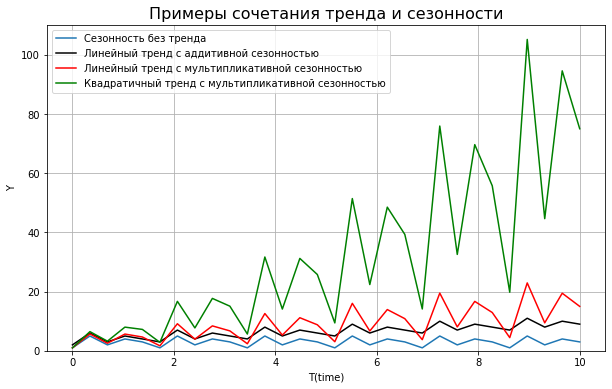

In [5]:
#Графически покажем примеры комбинаций тренда и сезонности
n = 30
x = np.linspace(0, 10, n)
t = [1, 5, 2, 4, 3]
k = np.linspace(1, 5, len(x))

def f(k):
  return k**2

# сезонность без тренда
def F1(n, t):
  return int(n/5)*t

# линейный тренд с аддитивной сезонностью
def F2(n, y):
  k_add = []
  l = 0
  for i in range(n):
    if i%5 == 0:
      l +=1
    k_add.append(l)

  y_add = []
  for i in range(n):
    y_add.append(k_add[i]+y[i])
  return y_add

# линейный тренд с мультипликативной сезонностью
def F3(n, t):
  y_lin = []
  j = 0
  for i in range(n):
    if i%5==0:
      j = 0
    y_lin.append(k[i]*t[j])
    j += 1
  return y_lin

# квадратичный тренд с мультипликативной сезонностью
def F4(n, t):
  f_k = f(k)
  y_q = []
  j = 0
  for i in range(n):
    if i%5==0:
      j = 0
    y_q.append(f_k[i]*t[j])
    i += 1
    j += 1
  return y_q

y = F1(n, t)
y_add = F2(n, y)
y_lin = F3(n, t)
y_q = F4(n, t)


fig,ax = plt.subplots(figsize = (10, 6))

ax.plot(x, y, label = "Сезонность без тренда")
ax.plot(x, y_add, color = 'black', label = "Линейный тренд с аддитивной сезонностью")
ax.plot(x, y_lin, color = 'red', label = "Линейный тренд с мультипликативной сезонностью")
ax.plot(x, y_q, color = 'g', label = "Квадратичный тренд с мультипликативной сезонностью")
plt.ylabel("Y")
plt.xlabel("T(time)")

ax.set_ylim(0, max(max(y), max(y_lin), max(y_q))+5)
plt.grid()
plt.title("Примеры сочетания тренда и сезонности", fontsize = 16)
plt.legend()

***Теперь перейдем к основным моделям прогнозирования***
## Модели: 
Список моделей:

- Модели экспоненциального сглаживания:
  - модель скользящей средней
  - модель взвешенной скользящей средней
  - модель Брауна
  
  - (Хольта (учитывается линейный тренд))
 
  - (Хольта-Уинтерса (мультипликативные экспоненциальный тренд и сезонность)) 
  
  - (Тейла-Вейджа (аддетивные линейный тренд и сезонность))
- Эконометрические модели:
  - регрессионный анализ (линейная регрессия, полиномиальная регрессия)
  - (авторегрессионные модели)

---

## Модели экспоненциального сглаживания 

### Модель скользящей средней
Суть модели скользящей средней — в вычислении усреднённых данных за определённый промежуток времени.

Данный метод может быть использован *в краткосрочном прогнозе* или же *для построения линии тренда* (тенденций).

**Недостатки модели:**
- может моделировать только линейные зависимости 
- чувствительность к скочкам, выбросам
- не предусматривает тренд и сезонность

Формула для краткосрочного прогноза:

 $$ y_{t+1} = m_{t-1} + \frac{1}{n}(y_t - y_{t-1}) $$
где:
- $y_{t+1}$ - прогнозируемое значение
- $y_{t}$ - значение, предшествующий прогнозируемому
- $y_{t-1}$ - значение, за 2 периода до прогнозируемого
- $m_{t-1} = \frac{1}{n}(t_{p-(n-1)}+t_{p-(n-2)}+...+t_{p})$ - скользящее среднее за 2 периода до прогнозируемого значения
- n - изменяемое значение (меньше, чем длина массива исторических данных)

**Перейдем к реализации.**


***Используем датасет с ценами на нефть***


In [6]:
#Загрузим датасет с ценами нефти за некоторый период.
df = pd.read_csv("BrentOilPrices.csv")

In [7]:
df.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


**Датасет представляет собой 2 столбца: в первом - дата, во втором - цена нефти.**

In [8]:
len(df)

8554

In [9]:
import plotly.graph_objects as go
from datetime import datetime
#Построим график
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.Date, y=df.Price))
fig.update_yaxes(title_text = "Price")
fig.update_xaxes(title_text = "Date")
fig.layout.title = "Data for all period"
fig.show()

Видим, что не наблюдается ни тренда, ни сезонности, ни цикличности. Поэтому можем взять любой промежуток времени.

In [10]:
#Выберем данные
l = 20
dflength = len(df)

df_cut = df.iloc[dflength-2*l-1:dflength-1] #последние 2*l значений
df_cut.index = np.arange(2*l)

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_cut.Date, y=df_cut.Price))
fig.layout.title = f'Data for last {2*l} days'
fig.update_yaxes(title_text = "Price")
fig.update_xaxes(title_text = "Date")
fig.show()


In [11]:
#Для метода скользящей средней выберем n = 3 
n = 3
m = [None]*2*l #скользящие средние 
for i in range(1,l-1):
  m[i] = round((df_cut.Price[i - 1] + df_cut.Price[i] + df_cut.Price[i + 1])/n, 3) # подсчет средних



In [12]:
# y - первая половина - реальные значения, вторая - прогнозируемые значения
y = np.array(df_cut.Price)
for i in range(l):
  y[l + i] =  m[l - 2 + i] + 1/n * (y[l - 1 + i] - y[l - 2 + i])
  m[l - 1 + i] = 1/3*(y[l - 2 + i] + y[l - 1 + i] + y[l + i]) 




In [13]:
df_cut_2 = df_cut.iloc[l:2*l] # последние l значений
df_cut_2.index = np.arange(l)
y_cut = y[l:2*l] #оставляем только прогнозируемые значения

fig = go.Figure()
fig.add_trace(go.Scatter(x = df_cut_2.Date, y = y_cut, name = 'predict'))
fig.add_trace(go.Scatter(x=df_cut_2.Date, y=df_cut_2.Price, name = 'real'))
fig.layout.title = "Moving average model"
fig.update_yaxes(title_text = "Price")
fig.update_xaxes(title_text = "Date")
fig.show()

Как видим, в качестве краткосрочного анализа и без сильных колебаний модель сработала вполне неплохо, но как только встречается быстрый рост - модель не справляется.


In [14]:
# Посчитаем относительные ошибки
sigma = [np.abs(df_cut_2.Price[i] - y_cut[i])/df_cut_2.Price[i]*100 for i in range(l)]
x = np.arange(1, l)
fig = go.Figure()
fig.add_trace(go.Scatter(x = x, y = sigma))
fig.layout.title = "Relative error (%)"
fig.update_xaxes(title_text = "forecasting horizon")
fig.update_yaxes(title_text = "error (%)")
fig.show()

*Вплоть до 6 периода прогнозирования относительная ошибка не выше 5%*


**Вывод:**

Довольно простая модель, которую легко реализовать вручную - это, безусловно, плюс. Но как говорилось выше - недостатков тоже предостаточно.

Для краткосрочного прогноза на равномерных данных, метод работает неплохо.В остальных случаях, метод не имеет интереса.

Понятно, что он представляет больше академический интерес, нежели практический.

---

***Перейдем к немного более усовершенствованной модели.***

### Модель взвешенной скользящей средней 
Модель взвешенной скользящей средней отличается от предыдущего тем, что при подсчете среднего, значения беруться с некими коэффициентами сумма которых равна 1.

Например, для $ n = 3 $: $$ m_{t-1} = \frac{1}{6}y_{t-2} + \frac{2}{6}y_{t-1} + \frac{3}{6}y_{t} $$

**Недостатки** точно такие же, как у модели простой скользящей средней.

**Приемущесвтом** же является то, что ближайшие к прогнозируемому значения имеют больший вес, благодаря чему прогноз может быть немного точнее. 

(реализацию осавим на потом, сравним с пред. моделью)

### Модель Брауна (модель экспоненциального сглаживания) 
Идея метода заключается в том,что прогнозное значение определяется через предыдущее cпрогнозированное значение, но скорректированное на величину отклонения факта от прогноза. (Модель также используется для сглаживания временных рядов, отображения тенденций).

**Недостатки модели**
- только краткосрочный прогноз
- не предусматриваются тренд и сезонность 

***Чтобы учесть их влияние, предлагается использовать модели:***

- Хольта (учитывается линейный тренд)
 
- Хольта-Уинтерса (мультипликативные экспоненциальный тренд и сезонность), 
  
- Тейла-Вейджа (аддетивные линейный тренд и сезонность).

(разберу их позже)

---

Прогноз осуществляется на 1 шаг по следующей формуле:
 $$ \overline{y}_{t+1} = \overline{y}_{t} + α(y_{t} - \overline{y}_{t}) $$
 где:
- $ \overline{y}_{t+1}$ - прогнозируемое значение 
- $\overline{y}_{t}$ - предыдущее значение прогноза (можно выбрать, как среднее арифметическое (можно с коэффициентами) истории наблюдений)
- $α$ - коэффициент 
- $y_t$ - фактическое значение 

**Выбор $α$:**

От величины α будет зависеть, как быстро снижается вес влияния предшествующих наблюдений. 

Чем больше α, тем меньше
сказывается влияние предшествующих лет:
- если значение α
близко к единице, то это приводит к учету при прогнозе в основном влияния лишь последних наблюдений; 

- если близко к нулю,
то веса, по которым взвешиваются уровни временного ряда, убывают медленно, т.е. при прогнозе учитываются все (или почти
все) прошлые наблюдения.

Далее прогноз осуществляется по следующим формулам: 
$$ F_{t+m} = a_t + b_tm $$
$$ a_{t} = 2\overline{y}_t - \overline{y}_{t+1} $$
$$ b_t = \frac{\alpha}{1-\alpha}(\overline{y}_t - \overline{y}_{t+1}) $$

(Реализацию оставим на потом) 



## Эконометрические модели
### Регрессионный анализ
**Линейная регрессия**

Линейный регрессионный анализ используется для прогнозирования значения
переменной на основе значения другой переменной. 

Это особенно полезный инструмент для
*предиктивного моделирования* и *прогнозирования*, обеспечивающий отличное понимание
текущих данных и прогнозирования данных в будущем.

*Цель* линейной регрессии состоит в том, чтобы создать линию наилучшего соответствия,
которая может предсказать значение зависимой переменной с помощью независимой
переменной.

Зависимость между одной входной и одной выходной переменными отражает следующее уравнение: 

$$ y = bx + a $$ 
где: 
- $x$ - входная переменная 
- $a$ - свободный член ( значение $y(0)$)
- $b$ - угловой коэффициент 
- $y$ - зависимая переменная 

Зависимость между несколькими входыми переменными и одной выходной отражает уравнение: 
$$ y = b_1x+ b_2x+...+b_nx +a$$

Недостатки модели:
- может моделировать только линейные зависимости 
- чувствительность к скочкам, выбросам





***Релизуем линейную регрессию с помощью библиотеки sklearn: встроенной модели LinearRegression.***

In [15]:
from sklearn.linear_model import LinearRegression
# вместо даты используем обычную числовую последовательность 
x_train = df_cut.index[0:l].to_numpy().reshape(-1, 1)
y_train = df_cut.Price[0:l].to_numpy()

lin_reg = LinearRegression().fit(x_train, y_train)

In [16]:
x_test = np.arange(2*l).reshape(-1, 1)

fig = go.Figure()
fig.add_trace(go.Scatter(x = df_cut.Date, y = df_cut.Price, name = "real"))
fig.add_trace(go.Scatter(x = df_cut.Date, y = lin_reg.predict(x_test), name = "lineal regression"))

fig.add_trace(go.Scatter(x = [df_cut.Date[l-1], df_cut.Date[l-1]], y = [min(df_cut.Price), max(df_cut.Price)] , name = "separator"))
fig.layout.title = "Linear Regression"
fig.update_xaxes(title_text = "Date")
fig.update_yaxes(title_text = "Price ")
fig.show()

Справа от разделителя (зеленая линия) начинается прогнозирование.
Как видим, вполне неплохой прогноз и ясно почему - на данной промежутке времени у цен на нефть линейная тенденция и нет сильных колебаний.

Посчитаем среднеквадратичную ошибку:

In [17]:
from sklearn.metrics import mean_squared_error
x_pred = np.array([l+i for i in range(l)]).reshape(-1, 1)
y_pred = lin_reg.predict(x_pred) 

In [18]:
#построим график зависимости среднеквадратичной ошибки от горизонта прогнозирования
MSE_ = [mean_squared_error(df_cut_2.Price[0:i], y_pred[0:i]) for i in range(1,l)]

fig = go.Figure()
fig.add_trace(go.Scatter(x = df_cut_2.Date, y = MSE_, name = "MSE"))

fig.layout.title = "MSE"
fig.update_xaxes(title_text = "Date")
fig.update_yaxes(title_text = "mse")
fig.show()

По графику можно увидеть, что модель чувствительна к скачкам.
Также ошибка очень нестабильна.

**Вывод:** 

Линейная регрессия пускай мало применима, но для конкретных данных может точно отражать тенденцию и прогнозировать значения на несколько шагов.

**Полиномиальная линейная регрессия**

Полиномиальная регрессия - это форма регрессионного анализа, в
которой взаимосвязь между независимой переменной x и зависимой
переменной y моделируются как *полином n-й степени от x*. 

Полиномиальная регрессия соответствует нелинейной зависимости между значением x и y.

Запишем формулу полиномиальной регрессии 2-ой и 3-ей степени для
одного параметра:
$$𝑦 = 𝑎_0 + 𝑎_1𝑥 + 𝑎_2𝑥^2$$
$$𝑦 = 𝑎_0 + 𝑎_1𝑥 + 𝑎_2𝑥^2 + 𝑎_3𝑥^3$$
Это все еще считается линейной моделью, поскольку веса, связанные с
признаками, все еще линейны. $𝑥^2$ и $𝑥^3$ это только особенность.

***Реализовывать будем с помощью класса Polynomialfeatures из библиотеки sklearn.***


In [19]:
#Сначала снова выберем данные
l2 = 30
dflength = len(df)

df_cut = df.iloc[dflength-2*l2-1:dflength-1]
df_cut.index = np.arange(2*l2)

In [20]:
x2 = np.arange(l2).reshape(-1, 1)
y2 = df_cut.Price[0:l2].to_numpy()

In [21]:
from sklearn.preprocessing import PolynomialFeatures
degree = 3

poly_reg = PolynomialFeatures(degree = degree)
x_poly = poly_reg.fit_transform(x2) 

In [22]:
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y2)

LinearRegression()

In [23]:
x_poly2 = poly_reg.fit_transform(np.arange(2*l2).reshape(-1, 1))
fig = go.Figure()
fig.add_trace(go.Scatter(x = df_cut.Date, y = df_cut.Price, name = "real", ))
fig.add_trace(go.Scatter(x = df_cut.Date, y = lin_reg2.predict(x_poly2), name = "plynomial regression", ))

fig.add_trace(go.Scatter(x = [df_cut.Date[l2-1], df_cut.Date[l2-1]], y = [min(df_cut.Price), max(df_cut.Price)] , name = "separator", ))

fig.layout.title = f'Polinomial Regression (degree = {degree})'
fig.update_xaxes(title_text = "Date")
fig.update_yaxes(title_text = "Price ")
fig.show()

Аналогично, справа от разделителя идет прогнозирование.
Опытным путем

**Вывод** 

Я выяснил, что нужно внимаетельно выбирать промежуток прогнозирования. В некоторых случаях полином неверно отражал тенденцию.

Ну и, конечно, отметим, что метод применим более для краткосрочного прогнозирования.


# Методы и их реализация

Список методов: 
- Графические методы: 
  - японские свечи
  
- Методы Data Mining:
  - нейронные сети
  - случайный лес
  
## Графический метод (Японские свечи)
### Описание и основные типы японских свечей
**Японские свечи** — популярный вид интервального биржевого графика, технический индикатор рынка. Был разработан в 18 веке для торговли на японской рисовой бирже и дошёл до наших дней без значительных изменений, при этом оставаясь предельно наглядным и эффективным.

 Построение графика японских свечей основано на четырёх показателях:
 - точках открытия и закрытия
 - максимальной и минимальной цене. 
 
Каждый участок графика отражает состояние этих показателей позиции в заданный период (таймфрейм). Различные виды свечей позволяют трейдеру определить положение быков и медведей. Движения на графике образуют типичные комбинации (фигуры), по которым трейдер может прогнозировать дальнейшее поведение цены.


**Типы:**
![alt text for screen readers](https://s3.open-broker.ru/site/journals/images/ZERbQbn9P6coUSXLEPV5XYWmryYJMq3aVQQEIIlJ.jpg "Text to show on mouseover")
Существует всего два типа свечей — растущая (бычья) и падающая (медвежья). Светлая свеча сообщает о движении цены вверх, тёмная — о движении цены вниз. При этом длина тела свечи зависит от размера ценовой разницы.

![alt text for screen readers](https://s3.open-broker.ru/site/journals/images/w2MSlW2jacVlho6glpUIZfujrqYmmoumhMfzmtXr.jpg "Text to show on mouseover")

### Основные комбинации японских свечей
**Утренняя звезда**

![alt text for screen readers](https://s3.open-broker.ru/site/journals/images/XL4A4sFxYz58I2TCDTk3kIQEJUBkN9U4hOnnBMjx.jpg "Text to show on mouseover")

Довольно редкая комбинация из трёх свечей, при которой первая — обязательно медвежья, вторая — бычья с коротким телом или дожи, а третья — большая бычья. Наиболее явный сигнал подаёт рисунок, при котором чёрная и белая свечи намного длиннее звезды. Утренняя звезда — явный признак начала бычьего тренда.
___
**Вечерняя звезда**

![alt text for screen readers](https://s3.open-broker.ru/site/journals/images/FfqFF4eLJEokCGdJZLxEDT2tIgSmKa5LTkzYtcr1.jpg "Text to show on mouseover")

Противоположность утренней звезды — сигнал о победе медведей. На графике эта комбинация японских свечей всегда сопровождается гэпами.
___
**Падающая звезда**

![alt text for screen readers](https://s3.open-broker.ru/site/journals/images/M0NDeN34PGTbQZqlApg8ia0B7YVIYBnXhgtM3ASV.jpg "Text to show on mouseover")

Внешне эта фигура похожа на перевёрнутый молот, но отличается положением на графике. Перед падающей звездой должен наблюдаться рост быков, затем следует небольшое верхнее окно, и только потом открывается свеча.
___
**Поглощение**

![alt text for screen readers](https://s3.open-broker.ru/site/journals/images/7aOitjG7peSz3gKo5W7Gkw0Ijo72zehfIBHKqGqW.jpg "Text to show on mouseover")

Состоит из двух стоящих рядом свечей разного цвета, где тело второй свечи полностью закрывает тело предыдущей.

Если черная потом белая - *бычье поглощение*.

Если наоборот - *медвежье поглощение*. 

Эта комбинация часто появляется на графике и может свидетельствовать о том, что тренд на рынке меняется. Чтобы подтвердить разворот тренда, рекомендуется дождаться появления второй свечи или использовать дополнительные индикаторы.

**Рассмотрим, как строить японские свечи в Python**

In [24]:
#Пример построения графика "японские свечи"

open_data = [33.0, 33.3, 33.5, 33.0, 34.1, 36, 32, 33]
high_data = [33.1, 33.3, 33.6, 33.2, 34.8, 36, 36, 33]
low_data = [32.7, 32.7, 32.8, 32.6, 32.8, 31, 32, 29]
close_data = [33.0, 32.9, 33.3, 33.1, 33.1, 34, 35, 30]
dates = [datetime(year=2013, month=10, day=10),
         datetime(year=2013, month=11, day=10),
         datetime(year=2013, month=12, day=10),
         datetime(year=2014, month=1, day=10),
         datetime(year=2014, month=2, day=10), 
         datetime(year=2014, month=3, day=10),
         datetime(year=2014, month=4, day=10),
         datetime(year=2014, month=5, day=10)]

fig = go.Figure(data=[go.Candlestick(x=dates,
                       open=open_data, high=high_data,
                       low=low_data, close=close_data)])
fig.layout.title = "Candlestick chart (Example)"
fig.update_yaxes(title_text = "Price")
fig.update_xaxes(title_text = "Date")


fig.show()

Позже я подберу нужный датасет и реализую прогнозирование с помощью метода "Японские свечи"
 

##Методы Data Mining
###Нейронные сети

Нейронная сеть представляют собой систему соединённых и взаимодействующих между собой простых процессоров (нейронов).

Структурная схема нейронной сети:
- зеленый цвет – входной слой нейронов
- синий – скрытый(промежуточный) слой нейронов
- желтый – выходной слой нейронов.

![alt text for screen readers](https://habrastorage.org/r/w1560/getpro/habr/post_images/b8a/8a5/925/b8a8a5925c9f7dbb937e488faa87ba4a.png "Text to show on mouseover")

*Нейрон* – базовый элемент нейронной сети, единичный простой вычислительный процессор способный воспринимать, преобразовывать и распространять сигналы, в свою очередь объединение большого количества нейронов в одну сеть позволяет решать достаточно сложные задачи.

Попробуем решить потавленную задачу с помощью модели "Случайный лес".
### Случайный лес 
Для начала рассмотрим понятие такое дерево решений, так как не трудно
догадаться, что лес состоит из деревьев.

**Дерево принятия решений** — это дерево, в листьях которого стоят
значения целевой функции, а в остальных узлах — условия перехода (к
примеру “ПОЛ есть МУЖСКОЙ”), определяющие по какому из ребер идти.
Если для данного наблюдения условие истина то осуществляется переход по
левому ребру, если же ложь — по правому.

Мы предсказываем значение непрерывной функции, поэтому
используем регрессионную модель. Рассмотрим, как работает регрессионное
дерево решений на одномерном примере

Пусть нам надо предсказать в зависимости от возраста, во сколько
просыпается человек, и дан некоторый набор данных. Тогда дерево строиться
следующим образом:

![alt text for screen readers](https://sun9-69.userapi.com/impf/l7Lp3IUGVSDIdQdYSQahniMmGJoIrL4IsVFcXg/UY1tOpTbG7E.jpg?size=861x486&quality=96&sign=93a01354686e0b7ab0036badd8759a4c&type=album "Text to show on mouseover")

Так дерево обучается до того момента, пока мы не получим довольно
точное предсказание. Но если не ограничить глубину дерева или иметь
слишком маленький набор данных, то может произойти переобучение, т.е.
модель, помимо отображения реальных трендов в обучающих данных, будет
отображать и шумы – данные, которые являются скорее исключением, чем
правилом. Шумы свойственны любому набору данных.

![alt text for screen readers](https://sun9-78.userapi.com/impf/LiogNz6ESzB5RpX6uuPFAIZt823VDyoNrLfSGw/0JQXHkXnNNc.jpg?size=878x496&quality=96&sign=e9f53257f9089fc7a13a552e19462080&type=album "Text to show on mouseover")

Здесь и приходит на помощь случайный лес.

**Случайный лес** — модель, состоящая из множества деревьев решений.
Вместо того, чтобы просто усреднять прогнозы разных деревьев (такая
концепция называется просто «лес»), эта модель использует две ключевые
концепции, которые и делают этот лес случайным.

- Случайная выборка образцов из набора данных при построении
деревьев.
В процессе тренировки каждое дерево случайного леса учится на
случайном образце из набора данных. Выборка образцов происходит с
возмещением (в статистике этот метод называется
бутстреппинг, bootstrapping). Это даёт возможность повторно
использовать образцы одним и тем же деревом. Хотя каждое дерево
может быть высоковариативным по отношению к определённому
набору тренировочных данных, обучение деревьев на разных наборах
образцов позволяет понизить общую вариативность леса, не жертвуя
точностью

- При разделении узлов выбираются случайные наборы параметров.
Вторая базовая концепция случайного леса заключается в
использовании определённой выборки параметров образца для
разделения каждого узла в каждом отдельном дереве.
Обычно размер выборки равен квадратному корню из общего числа
параметров. То есть, если каждый образец набора данных содержит 16
параметров, то в каждом отдельном узле будет использовано 4.
Обучение случайного леса можно провести и с полным набором
параметров, как это обычно делается при регрессии.

*При тестировании результат выводится путём усреднения прогнозов,
полученных от каждого дерева.*



**Ожидания**

Я думаю, что модель не справиться именно с нашим набором данных, потому что отсутствуют какие-либо видимые закономерности в данных, следовательно, модели не на что будет "опереться".


In [25]:
# Сначала преобразуем данные о дате к категориальному виду.
from dateutil import parser
try:
  for i in range(len(df)):
    df.Date[i] = parser.parse(df.Date[i])
except:
  print("Already parsed or some other mistakes")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
day = pd.get_dummies(df.Date[i].strftime("%d") for i in range(len(df)))
month = pd.get_dummies(df.Date[i].strftime("%m") for i in range(len(df)))
year = pd.get_dummies(df.Date[i].strftime("%Y") for i in range(len(df)))

x_data = pd.concat([day, month, year], axis = 1)
x_data

,01,02,03,04,05,06,07,08,09,10,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8549,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8550,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8551,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8552,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


***Данные о дате в категориальном виде для обучения и тестирования случайного леса***

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(x_data, df.Price, test_size=0.05, random_state=0)

model_rf = RandomForestRegressor(n_estimators=50,random_state=0, max_features = None) 

model_rf.fit(X_train,y_train)

y_pred_train = model_rf.predict(X_train)
mse = mean_squared_error(y_pred_train ,y_train)

y_pred_test = model_rf.predict(X_test)
mse = mean_squared_error(y_pred_test ,y_test)





In [28]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df.Date, y = df.Price, name = "real", ))
fig.add_trace(go.Scatter(x = df.Date, y = np.concatenate((y_pred_train,y_pred_test)), name = "random forest", ))

fig.add_trace(go.Scatter(x = [df.Date[len(X_train)], df.Date[len(X_train)]], y = [min(df.Price), max(df.Price)] , name = "separator" ))

fig.layout.title = f'Random Forest'
fig.update_xaxes(title_text = "Date")
fig.update_yaxes(title_text = "Price ")
fig.show()

Как видим, модель не справилась (можно попробовать на других данных)

## Виды расчета ошибок при прогнозировании 
**Ошибка прогнозирования** — это такая величина, которая показывает, как сильно прогнозное значение отклонилось от фактического. Она используется для расчета точности прогнозирования, что в свою очередь помогает нам оценивать как точно и корректно мы сформировали прогноз.

Рассмотрим следующие ошибки:
- Mean Percent Error = MPE 
- Mean Absolute Percent Error - MAPE 
- Weighted Absolute Percent Error - WAPE
-  Root Mean Square Error - RMSE
- Mean Absolute Scaled Error - MASE

### MPE - Mean Percent Error  
MPE — средняя процентная ошибка прогнозирования.

**Недостатки:**
- в нестабильном числовом ряду с большими выбросами любое незначительное колебание факта или прогноза может значительно поменять показатель ошибки
- несимметричность: одинаковые отклонения в плюс и в минус по-разному влияют на показатель ошибки.

**Формула:** 
$$ MPE = \frac{1}{n}\sum_{i = 1}^{n}\frac{ \Phi_i - \Pi_i}{\Phi_i} $$ 

### MAPE - Mean Absolute Percent Error
MAPE — средняя абсолютная процентная ошибка прогнозирования.

**Недостатки**:
- основная проблема та же, что и у MPE - нестабильность 

**Формула:**
$$ MAPE = \frac{1}{n}\sum_{i = 1}^{n}|{\frac{ \Phi_i - \Pi_i}{\Phi_i}}| $$ 

###WAPE - Weighted Absolute Percent Error 
WAPE — взвешенная абсолютная процентная ошибка прогнозирования.

Данная ошибка прогнозирования является симметричной и наименее чувствительна к искажениям числового ряда.

**Формула:** 
$$ WAPE = \frac{\frac{1}{n}\sum_{i = 1}^{n}| \Phi_i - \Pi_i|}{\frac{1}{n}\sum_{i = 1}^{n} \Phi_i } = \frac{\sum_{i = 1}^{n}| \Phi_i - \Pi_i|}{\sum_{i = 1}^{n} \Phi_i }$$  

###RMSE - Root Mean Square Error 
RMSE — среднеквадратичная ошибка прогнозирования.

Та же проблема, что и в MPE, MAPE - небольшое отклонение может повлиять на показатель ошибки, при этом решена проблема несимметричности.

**Формула:**
$$ WAPE = \sqrt{\frac{1}{n}\sum_{i = 1}^{n}( \Phi_i - \Pi_i)^2 }$$

### MASE - Mean Absolute Scaled Error
MASE — средняя абсолютная масштабированная ошибка прогнозирования.

Согласно Википедии, является очень хорошим вариантом для расчета точности, так как сама ошибка *не зависит от масштабов данных и является симметричной*: то есть положительные и отрицательные отклонения от факта рассматриваются в равной степени.

MASE используется для расчета точности прогнозирования *одной единственной позиции*, основываясь на предыдущих показателях факта и прогноза, и чем больше этих показателей, тем более точно мы сможем рассчитать показатель точности.

Суть формулы заключается в нахождении среднего арифметического всех масштабированных ошибок, что при упрощении даст нам следующую конечную формулу:

**Формула:**
$$ MASE = \frac{\sum_{i = 1}^{n}|\Phi_i - \Pi_i | }{\frac{n}{n-1}\sum_{i = 2}^{n}| \Phi_i - \Phi_{i-1} | } $$


#Заключение 
- В данной работе рассмотрена задача прогнозирования, а также, некоторые методы и модели для решения этой задачи.

- Выделены их основные приемущества и недостатки. Для методов, которые были реализованы, приемуществами являются простота построения. Недостатками же - возможность только краткосрочного прогноза без учета тренда и сезонности.

- Изучены примеры рассчета ошибок при прогнозировании. 

- Реализованы:
  - модель скользящей средней
  - методы: линейная и полиномиальная регрессии с помощью языка Python. 

- В дальнейшем планируется выполнить исследование других методов и моделей для работы с более сложными массивами данных.

## Источники 
https://wiki.loginom.ru/algorithms.html

https://math.spbu.ru/SD_AIS/documents/2015-12-341/2015-12-b-19.pdf

https://cyberleninka.ru/article/n/reshenie-zadachi-prognozirovaniya-s-pomoschyu-neyronnyh-setey/viewer

https://russianblogs.com/article/89801196129/


http://distrland.blogspot.com/2019/09/7-python.html

https://eup.sgu.ru/sites/eup.sgu.ru/files/2019/06/galina_yu._chernyshova_181-188.pdf ( ошибки)

http://www.machinelearning.ru/wiki/images/archive/c/cb/20160412121749!voron-ml-forecasting-slides.pdf (лекция яндекс)

https://intuit.ru/studies/courses/6/6/lecture/168?page=2 (основа)

https://www.kaggle.com/code/gouherdanishiitkgp/eda-and-forecasting-brent-oil-prices/notebook (датасет)

http://www.ekonomika-st.ru/drugie/metodi/metodi-prognoz-1-3.html (пример: скользящая средняя)

https://www.altstu.ru/media/f/Tema5trend.pdf (создание линии тренда)

https://linis.hse.ru/data/2014/09/04/1316346389/%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D1%8F%205.pdf (лекция от ВШЭ)

https://www.rea.ru/ru/org/branches/volgograd/Documents/umm/2018-2019/%D0%9F%D0%BB%D0%B0%D0%BD%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5-%D0%B8-%D0%BF%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5-%D0%B2-%D1%8D%D0%BA%D0%BE%D0%BD%D0%BE%D0%BC%D0%B8%D0%BA%D0%B5_%D0%A8%D0%B0%D1%80%D0%BA%D0%B5%D0%B2%D0%B8%D1%87-%D0%98.%D0%92.pdf (планирование и прогнозирование в экономике)


http://mas.exponenta.ru/literature/server%20model.pdf (модель Брауна)

https://jurnal.ahmar.id/index.php/asci/article/download/67/85 (comparison of Holt's and Brown's Double Exponential Smoothing
Methods)

https://russianblogs.com/article/42091619789/ (некоторые регрессионные модели)

